# Algoritmo de Random Forest

El algoritmo de Random Forest es un método de aprendizaje conjunto para clasificación, regresión y otras tareas que opera construyendo una multitud de árboles de decisión en el momento del entrenamiento y generando la clase que es la moda de las clasificaciones (clasificación) o predicción media (regresión) de los árboles individuales.

## ¿Cómo funciona?

Random Forest mejora el modelo de un solo árbol de decisión al agregar un elemento de aleatoriedad durante la construcción del modelo. El algoritmo sigue estos pasos:

1. **Bootstrap sampling**: Selecciona aleatoriamente muestras del conjunto de datos con reemplazo para construir múltiples conjuntos de entrenamiento. Esto se conoce como 'bagging' o 'Bootstrap Aggregating'.

2. **Construcción de árboles**: Para cada muestra de entrenamiento generada, se construye un árbol de decisión. Para aumentar la diversidad, cada árbol se construye de la siguiente manera:
   - En cada división, se selecciona un subconjunto aleatorio de las características (variables).
   - Se elige la mejor división de este subconjunto (no de todas las características) para dividir el nodo.
   - Cada árbol se desarrolla hasta el máximo, sin podar.

3. **Predicción**:
   - En el caso de la **clasificación**, para una nueva muestra, cada árbol en el bosque predice una clase y la clase con la mayoría de votos se convierte en la predicción del modelo.
   - En el caso de la **regresión**, se promedian las predicciones de todos los árboles.

## Ventajas de Random Forest

- **Robustez**: Al promediar los resultados de varios árboles, reduce la varianza y evita el sobreajuste, lo que lo hace más robusto que un único árbol de decisión.
- **Manejo de datos no lineales**: Puede capturar relaciones no lineales entre las características y la variable de salida.
- **Importancia de las características**: Puede proporcionar una estimación de qué variables son importantes en la clasificación.
- **Manejo de datos faltantes**: Puede manejar datos faltantes al mantener la precisión cuando una parte de los datos está ausente.

## Desventajas de Random Forest

- **Complejidad**: Es más complejo y computacionalmente más intensivo que un árbol de decisión.
- **Interpretabilidad**: Aunque cada árbol individual es interpretable, el conjunto del bosque puede ser difícil de interpretar.
- **Tiempo de entrenamiento**: El entrenamiento puede ser lento, especialmente en conjuntos de datos grandes y complejos.

Random Forest es una extensión natural de los árboles de decisión y es útil cuando necesitamos un equilibrio entre facilidad de uso y rendimiento predictivo.

# Predicción de Diabetes

## Problema a Resolver

El objetivo de este análisis es utilizar el algoritmo de Random Forest para predecir si un paciente tiene diabetes, basándose en ciertas medidas diagnósticas incluidas en el conjunto de datos. Se trata de un problema de clasificación binaria, donde el resultado a predecir es si el paciente tiene diabetes (1) o no (0).

## Descripción de las Variables

El conjunto de datos consta de varias variables médicas predictivas y una variable objetivo:

- **Embarazos**: Número de veces que la paciente ha estado embarazada.
- **Glucosa**: Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa. Un nivel alto de glucosa en plasma tras 2 horas indica resistencia a la insulina y puede ser signo de diabetes.
- **PresionArterial**: Presión arterial diastólica (la presión más baja en las arterias durante el ciclo cardíaco). La hipertensión está asociada con mayores riesgos de diabetes.
- **GrosorPiel**: Grosor del pliegue cutáneo del tríceps. Un método para estimar la cantidad de grasa corporal.
- **Insulina**: Esta variable mide el nivel de insulina en la sangre dos horas después de que una persona ha ingerido glucosa.
- **IMC**: Índice de Masa Corporal. La obesidad es un factor de riesgo significativo para la diabetes.
- **FuncionPedigriDiabetes**: Una función que representa la predisposición genética a la diabetes, basada en la historia familiar.
- **Edad**: Edad en años. El riesgo de diabetes aumenta con la edad.

Con estas variables, desarrollaremos un modelo para predecir el **Resultado**, que indica si la persona tiene diabetes (1) o no (0).

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Carga el dataset de diabetes
file_path = 'diabetes.csv'
diabetes_df = pd.read_csv(file_path)

# Muestra las primeras filas del dataframe
diabetes_df.head()

,Embarazos,Glucosa,PresionArterial,GrosorPiel,Insulina,IMC,FuncionPedigriDiabetes,Edad,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Análisis Exploratorio de Datos (EDA)

Antes de sumergirnos en la construcción de modelos de aprendizaje automático, es esencial realizar un Análisis Exploratorio de Datos (EDA). El EDA nos ayudará a entender mejor las características del conjunto de datos, detectar posibles anomalías y formular hipótesis sobre los datos.

## Estadísticas Descriptivas

Comenzaremos el EDA obteniendo estadísticas descriptivas de nuestro conjunto de datos. Esto incluye contar el número de entradas, calcular la media, mediana, desviación estándar, valores mínimos y máximos, y los cuartiles de cada columna. Esta información es fundamental para tener una visión general de las distribuciones y la escala de cada variable.

## Datos Faltantes

Tras obtener las estadísticas descriptivas, nuestro siguiente paso es identificar si existen datos faltantes en nuestro conjunto de datos. La presencia de datos faltantes puede afectar el rendimiento de nuestro modelo de Random Forest y sesgar nuestras conclusiones. Por lo tanto, es crucial identificar y decidir cómo manejar estos valores faltantes, ya sea mediante imputación o eliminación de los registros afectados.

In [ ]:
# Estadísticas Descriptivas
descriptive_stats = diabetes_df.describe()

# Detección de Datos Faltantes
missing_values = diabetes_df.isnull().sum()

# Visualización de las Estadísticas Descriptivas
print(descriptive_stats)

# Visualización de los Datos Faltantes
print(missing_values)

        Embarazos     Glucosa  PresionArterial  GrosorPiel    Insulina  \
count  768.000000  768.000000       768.000000  768.000000  768.000000   
mean     3.845052  120.894531        69.105469   20.536458   79.799479   
std      3.369578   31.972618        19.355807   15.952218  115.244002   
min      0.000000    0.000000         0.000000    0.000000    0.000000   
25%      1.000000   99.000000        62.000000    0.000000    0.000000   
50%      3.000000  117.000000        72.000000   23.000000   30.500000   
75%      6.000000  140.250000        80.000000   32.000000  127.250000   
max     17.000000  199.000000       122.000000   99.000000  846.000000   

              IMC  FuncionPedigriDiabetes        Edad   Resultado  
count  768.000000              768.000000  768.000000  768.000000  
mean    31.992578                0.471876   33.240885    0.348958  
std      7.884160                0.331329   11.760232    0.476951  
min      0.000000                0.078000   21.000000    0.00

# Valores de Cero en el Dataset de Diabetes

Al revisar el conjunto de datos de diabetes, notamos la presencia de valores de 0 en varias columnas. Sin embargo, en el contexto médico de este dataset, ciertos valores de 0 no son válidos ya que representan la ausencia de la medida médica en lugar de una medida real de cero. A continuación, se explica cómo se recomienda manejar estos valores de 0 para cada variable:

- **Glucosa**: Un nivel de glucosa de 0 no es posible ya que la glucosa siempre está presente en la sangre. Por lo tanto, se recomienda imputar estos valores con una medida central como la media o la mediana de la columna.
- **PresionArterial**: Una presión arterial diastólica de 0 no es viable clínicamente. Estos valores deben ser imputados o las observaciones eliminadas.
- **GrosorPiel**: Un grosor de piel de 0 no es realista ya que todos los humanos tienen algún grosor de piel, incluso si es delgado. Se deberían imputar estos valores.
- **Insulina**: Un nivel de insulina de 0 es inusual y probablemente indica una medición no tomada o perdida. Estos valores también deben ser imputados.
- **IMC**: Un Índice de Masa Corporal (IMC) de 0 no es posible; estos valores deben ser imputados.

Para las variables **'Embarazos'** y **'Resultado'**, un valor de 0 es válido ya que '0' embarazos es posible y '0' en la columna de resultado indica que no hay presencia de diabetes.

## Estrategias de Imputación

La estrategia de imputación puede variar dependiendo del patrón de los datos faltantes y el mecanismo subyacente que los produce. Algunas estrategias comunes incluyen:

- Imputación con la media o la mediana: útil cuando los datos faltantes son aleatorios y no hay una cantidad excesiva de ellos.
- Imputación mediante métodos de modelado: como la regresión lineal o algoritmos de machine learning, que pueden ser más precisos pero también más complejos.
- Eliminación de registros: si los datos faltantes no son aleatorios o si la cantidad de datos faltantes es pequeña, se pueden eliminar los registros.

Es esencial realizar un análisis cuidadoso para determinar la estrategia más adecuada antes de proceder con cualquier método de imputación o eliminación.

In [ ]:
# Imputación de valores de 0 con la mediana para las columnas especificadas
columns_to_impute = ['Glucosa', 'PresionArterial', 'GrosorPiel', 'Insulina', 'IMC']

for column in columns_to_impute:
    # Calculamos la mediana de la columna, excluyendo los ceros
    median_value = diabetes_df[diabetes_df[column] != 0][column].median()
    # Reemplazamos los ceros con la mediana
    diabetes_df[column] = diabetes_df[column].replace(0, median_value)

# Verificación de la imputación
imputation_check = diabetes_df[columns_to_impute].min()

print(imputation_check)

Glucosa            44.0
PresionArterial    24.0
GrosorPiel          7.0
Insulina           14.0
IMC                18.2
dtype: float64


# Optimización del Uso de Memoria del DataFrame

Al trabajar con conjuntos de datos en ciencia de datos y aprendizaje automático, es fundamental gestionar eficientemente los recursos, en particular la memoria. Un uso eficiente de la memoria puede traducirse en un procesamiento más rápido y en la posibilidad de manejar conjuntos de datos más grandes de manera efectiva.

## ¿Por qué Optimizar la Memoria?

Inicialmente, al cargar nuestro `DataFrame` y utilizar el método `.info()`, observamos que ciertas columnas utilizan tipos de datos (`int64`, `float64`) que pueden ser más grandes de lo necesario. Estos tipos de datos de mayor tamaño ocupan más memoria, lo cual puede no ser eficiente, especialmente cuando los valores reales de los datos pueden representarse con tipos de datos más pequeños.

In [ ]:
# Primero, revisamos los tipos de datos y el uso de memoria
print(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Embarazos               768 non-null    int64  
 1   Glucosa                 768 non-null    int64  
 2   PresionArterial         768 non-null    int64  
 3   GrosorPiel              768 non-null    int64  
 4   Insulina                768 non-null    int64  
 5   IMC                     768 non-null    float64
 6   FuncionPedigriDiabetes  768 non-null    float64
 7   Edad                    768 non-null    int64  
 8   Resultado               768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


## Estrategia de Optimización

La estrategia para optimizar el uso de memoria implica cambiar los tipos de datos de las columnas a formatos que consuman menos memoria, pero que aún puedan representar todos los valores en la columna. Por ejemplo:

- Cambiar de `int64` a `int16` o `int8` cuando los valores máximos y mínimos de la columna se encuentran dentro del rango que estos tipos pueden representar.
- Cambiar de `float64` a `float32` para reducir a la mitad el uso de memoria por cada valor de punto flotante.

Esta optimización es particularmente útil para mejorar la eficiencia general en el manejo de datos y es una buena práctica en la preparación de datos para el modelado con algoritmos de aprendizaje automático como Random Forest.

Al final de este proceso, volveremos a utilizar `.info()` para verificar la reducción efectiva en el uso de memoria.

In [ ]:
diabetes_df['Embarazos'] = diabetes_df['Embarazos'].astype('int8')
diabetes_df['Glucosa'] = diabetes_df['Glucosa'].astype('int16')
diabetes_df['PresionArterial'] = diabetes_df['PresionArterial'].astype('int8')
diabetes_df['GrosorPiel'] = diabetes_df['GrosorPiel'].astype('int8')
diabetes_df['Insulina'] = diabetes_df['Insulina'].astype('int16')
diabetes_df['Edad'] = diabetes_df['Edad'].astype('int8')
diabetes_df['Resultado'] = diabetes_df['Resultado'].astype('int8')
diabetes_df['IMC'] = diabetes_df['IMC'].astype('float32')
diabetes_df['FuncionPedigriDiabetes'] = diabetes_df['FuncionPedigriDiabetes'].astype('float32')

# Verificar los cambios realizados
print(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Embarazos               768 non-null    int8   
 1   Glucosa                 768 non-null    int16  
 2   PresionArterial         768 non-null    int8   
 3   GrosorPiel              768 non-null    int8   
 4   Insulina                768 non-null    int16  
 5   IMC                     768 non-null    float32
 6   FuncionPedigriDiabetes  768 non-null    float32
 7   Edad                    768 non-null    int8   
 8   Resultado               768 non-null    int8   
dtypes: float32(2), int16(2), int8(5)
memory usage: 12.9 KB
None


# Implementación del Algoritmo Random Forest con Scikit-Learn

Para implementar el algoritmo Random Forest en Python, utilizaremos la clase `RandomForestClassifier` de la biblioteca scikit-learn. Esta clase es ampliamente utilizada por su facilidad de uso y sus potentes capacidades.

## `RandomForestClassifier` y sus Parámetros

`RandomForestClassifier` es una clase que implementa un clasificador de Random Forest, que es un meta estimador que ajusta un número de clasificadores de árboles de decisión en varias submuestras del dataset y utiliza el promedio para mejorar la precisión predictiva y controlar el sobreajuste.

### Parámetros Clave y sus Valores Predeterminados

- `n_estimators`: Número de árboles en el bosque. Por defecto es 100. Aumentar este número mejora la precisión del modelo pero también aumenta el tiempo de entrenamiento.

- `criterion`: La función para medir la calidad de una división. Por defecto es 'gini', aunque también se puede usar 'entropy'. 'gini' tiende a ser más rápido de calcular y 'entropy' puede generar árboles más balanceados.

- `max_depth`: La profundidad máxima del árbol. Por defecto es `None`, lo que significa que los nodos se expanden hasta que contienen menos que `min_samples_split` muestras. Limitar la profundidad puede ayudar a prevenir el sobreajuste.

- `min_samples_split`: El número mínimo de muestras requeridas para dividir un nodo interno. Por defecto es 2. Valores mayores pueden prevenir el sobreajuste, pero también pueden impedir que el modelo aprenda los datos suficientemente.

- `min_samples_leaf`: El número mínimo de muestras requeridas para estar en un nodo hoja. Por defecto es 1. Un número mayor suaviza el modelo, especialmente en regresión.

- `max_features`: El número de características a considerar al buscar la mejor división. Por defecto es `auto`, que toma todas las características. Reducir este número puede disminuir la varianza del modelo, pero también su precisión.

- `bootstrap`: Indica si se usan muestras de bootstrap para construir árboles. Por defecto es `True`, lo que significa que se utilizan muestras de bootstrap.

- `random_state`: Controla la aleatoriedad del bootstrapping y la selección de características. Puede ser un número entero para resultados reproducibles.

- `n_jobs`: Especifica el número de trabajos que se ejecutan en paralelo. Por defecto es `None`, lo que significa 1. Establecer en -1 utiliza todos los procesadores disponibles, lo que puede acelerar el entrenamiento.

- `class_weight`: Ponderaciones asociadas a clases. Por defecto es `None`, lo que significa que todas las clases tienen el peso uno. Esto puede ser útil en casos de clases desbalanceadas.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir el dataset en características (X) y la variable objetivo (y)
X = diabetes_df.drop('Resultado', axis=1)
y = diabetes_df['Resultado']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions = rf_model.predict(X_test)

# Calcular la precisión y la exactitud
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)

# Calcular y visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

print("Matriz de Confusión:")
print(conf_matrix)

# Imprimir las métricas de evaluación
print(f'Precisión: {precision}')
print(f'Exactitud: {accuracy}')

Matriz de Confusión:
[[120  31]
 [ 27  53]]
Precisión: 0.6309523809523809
Exactitud: 0.7489177489177489


# Análisis de la Matriz de Confusión

Recuerda que la matriz de confusión es una herramienta poderosa para evaluar el rendimiento de un modelo de clasificación. Proporciona una visión detallada de cómo el modelo está clasificando las observaciones entre las diferentes categorías.

## ¿Qué es la Matriz de Confusión?

La matriz de confusión es una tabla que se utiliza para describir el rendimiento de un modelo de clasificación en un conjunto de datos cuyos valores verdaderos son conocidos. En nuestro caso, compara los valores reales de diabetes (positivos o negativos) con los valores predichos por nuestro modelo.

La matriz consta de cuatro términos:
- Verdaderos Positivos (VP): Casos en los que el modelo predijo correctamente la presencia de diabetes.
- Falsos Positivos (FP): Casos en los que el modelo predijo incorrectamente la presencia de diabetes.
- Verdaderos Negativos (VN): Casos en los que el modelo predijo correctamente la ausencia de diabetes.
- Falsos Negativos (FN): Casos en los que el modelo predijo incorrectamente la ausencia de diabetes.

## Exactitud y Precisión

A partir de la matriz de confusión, podemos calcular dos métricas importantes:

- **Exactitud (Accuracy)**: Mide la proporción de predicciones correctas (tanto VP como VN) en relación con el total de predicciones. Se calcula como:
  $$
  \text{Exactitud} = \frac{VP + VN}{VP + FP + FN + VN}
  $$
  La exactitud es útil cuando las clases están equilibradas, es decir, tienen aproximadamente la misma cantidad de observaciones.

- **Precisión (Precision)**: Mide la proporción de predicciones positivas correctas en relación con el total de predicciones positivas. Se calcula como:
  $$
  \text{Precisión} = \frac{VP}{VP + FP}
  $$
  La precisión es importante en situaciones donde los Falsos Positivos son más preocupantes que los Falsos Negativos.

Estas métricas nos ayudan a entender la calidad del modelo y a identificar áreas donde el modelo puede necesitar mejoras, especialmente en el contexto de diagnóstico médico donde tanto los Falsos Positivos como los Falsos Negativos pueden tener consecuencias significativas.

# Optimización de Hiperparámetros

Después de evaluar nuestro modelo inicial de Random Forest, el siguiente paso es intentar mejorar su rendimiento ajustando los hiperparámetros. Para ello, podemos utilizar dos métodos populares: la Búsqueda en Rejilla (Grid Search) y la Búsqueda Aleatoria (Random Search).

## Búsqueda en Rejilla (Grid Search)

La Búsqueda en Rejilla consiste en definir un 'grid' o rejilla de hiperparámetros y probar todas las combinaciones posibles. Este método es exhaustivo y nos asegura que encontraremos la mejor combinación de parámetros dentro del rango definido. Sin embargo, puede ser computacionalmente costoso y lento, especialmente si el conjunto de datos es grande y hay muchos hiperparámetros para ajustar.

## Búsqueda Aleatoria (Random Search)

La Búsqueda Aleatoria, por otro lado, selecciona combinaciones aleatorias de hiperparámetros para probar. Esto reduce el número de combinaciones que necesitamos evaluar y puede ser mucho más rápido que la Búsqueda en Rejilla. Aunque no garantiza encontrar la mejor combinación posible de hiperparámetros, puede acercarse bastante en mucho menos tiempo.

## ¿Cuál es mejor?

La elección entre Búsqueda en Rejilla y Búsqueda Aleatoria depende del tamaño del conjunto de datos, la cantidad de hiperparámetros y los recursos computacionales disponibles. En general, la Búsqueda Aleatoria es una buena opción cuando se tiene un tiempo o recursos limitados, mientras que la Búsqueda en Rejilla es adecuada cuando se necesita la mejor combinación posible de hiperparámetros y se dispone de suficientes recursos para realizar el cálculo.

En la siguiente sección, aplicaremos una de estas técnicas para mejorar nuestro modelo de Random Forest y compararemos los resultados con nuestro modelo inicial.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Definir el conjunto de hiperparámetros para la búsqueda aleatoria
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo de Random Forest
rf = RandomForestClassifier(random_state=42)

# Realizar la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   scoring='accuracy', n_iter=500, cv=3, verbose=2,
                                   random_state=42, n_jobs=-1)

# Ajustar el modelo a los datos
random_search.fit(X_train, y_train)

# Mejores parámetros encontrados
print('Mejores parámetros:', random_search.best_params_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Mejores parámetros: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}


In [ ]:
# Crear el modelo de Random Forest con los mejores hiperparámetros
best_params = random_search.best_params_
rf_optimized = RandomForestClassifier(**best_params)

# Entrenar el modelo
rf_optimized.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions_optimized = rf_optimized.predict(X_test)

# Calcular la precisión y la exactitud
accuracy_optimized = accuracy_score(y_test, predictions_optimized)
precision_optimized = precision_score(y_test, predictions_optimized)

# Calcular y visualizar la matriz de confusión
conf_matrix_optimized = confusion_matrix(y_test, predictions_optimized)
print("Matriz de Confusión:")
print(conf_matrix_optimized)

# Imprimir las métricas de evaluación
print(f'Precisión Optimizada: {precision_optimized}')
print(f'Exactitud Optimizada: {accuracy_optimized}')

Matriz de Confusión:
[[123  28]
 [ 26  54]]
Precisión Optimizada: 0.6585365853658537
Exactitud Optimizada: 0.7662337662337663


# Ajuste Fino de Hiperparámetros con Búsqueda en Rejilla

Después de realizar una búsqueda aleatoria para encontrar una buena combinación de hiperparámetros para nuestro modelo de Random Forest, el siguiente paso es realizar un ajuste más fino de estos parámetros. Para esto, utilizaremos la técnica de Búsqueda en Rejilla (Grid Search), que nos permite explorar en detalle un rango más estrecho de valores alrededor de los mejores parámetros encontrados previamente.

## ¿Qué es el Ajuste Fino?

El ajuste fino implica explorar de manera más exhaustiva y detallada los hiperparámetros de un modelo para encontrar la configuración óptima. A diferencia de la búsqueda aleatoria, que prueba una muestra aleatoria de combinaciones de hiperparámetros, la búsqueda en rejilla prueba todas las combinaciones posibles dentro de un rango específico definido por nosotros.

## Implementación del Ajuste Fino

Para implementar la búsqueda en rejilla, definimos un conjunto de valores para cada hiperparámetro que queremos ajustar. Estos valores estarán centrados alrededor de los mejores parámetros encontrados en la búsqueda aleatoria. Luego, utilizamos `GridSearchCV` de scikit-learn, que probará sistemáticamente todas las combinaciones de estos valores en un proceso de validación cruzada.

## Beneficios del Ajuste Fino

Este método nos permite:
- Explorar en detalle un subconjunto específico de hiperparámetros.
- Aumentar las posibilidades de encontrar la combinación más óptima dentro del rango especificado.
- Mejorar potencialmente el rendimiento del modelo al ajustar con precisión los hiperparámetros.

Al final de este proceso, tendremos una idea clara de cuáles son los mejores hiperparámetros dentro del rango que hemos definido, lo que nos ayudará a construir un modelo de Random Forest aún más efectivo.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir el conjunto de hiperparámetros para la búsqueda en rejilla
param_grid = {
    'n_estimators': [250, 300, 350],
    'max_features': ['sqrt'],
    'max_depth': [8, 10, 12],
    'criterion': ['entropy'],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1]
}

# Crear el modelo de Random Forest
rf = RandomForestClassifier(random_state=42)

# Realizar la búsqueda en rejilla
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=2)

# Ajustar el modelo a los datos
grid_search.fit(X_train, y_train)

# Mejores parámetros encontrados
print('Mejores parámetros:', grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Mejores parámetros: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 300}


In [ ]:
# Crear el modelo de Random Forest con los mejores hiperparámetros
best_params = grid_search.best_params_
rf_optimized = RandomForestClassifier(**best_params)

# Entrenar el modelo
rf_optimized.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions_optimized = rf_optimized.predict(X_test)

# Calcular la precisión y la exactitud
accuracy_optimized = accuracy_score(y_test, predictions_optimized)
precision_optimized = precision_score(y_test, predictions_optimized)

# Calcular y visualizar la matriz de confusión
conf_matrix_optimized = confusion_matrix(y_test, predictions_optimized)
print("Matriz de Confusión:")
print(conf_matrix_optimized)

# Imprimir las métricas de evaluación
print(f'Precisión Optimizada: {precision_optimized}')
print(f'Exactitud Optimizada: {accuracy_optimized}')

Matriz de Confusión:
[[121  30]
 [ 27  53]]
Precisión Optimizada: 0.6385542168674698
Exactitud Optimizada: 0.7532467532467533


# Siguientes Pasos Después de la Optimización de Hiperparámetros

Aunque la optimización de hiperparámetros es una técnica poderosa para mejorar el rendimiento de los modelos de Machine Learning, a veces los incrementos en precisión o exactitud pueden ser modestos. Si tras ajustar los hiperparámetros del modelo de Random Forest sólo se observa una ligera mejora, como en nuestro caso, existen otras estrategias que podemos considerar:

## 1. **Ingeniería de Características (Feature Engineering)**
   La ingeniería de características puede tener un gran impacto en el rendimiento del modelo. Esto incluye:
   - **Crear nuevas características** a partir de las existentes.
   - **Transformar variables**: aplicar transformaciones logarítmicas, cuadráticas, etc., a las variables.
   - **Codificación de variables categóricas**: si hay variables categóricas, considera diferentes técnicas de codificación.
   - **Selección de características**: usar técnicas para seleccionar las características más importantes.

## 2. **Manejo de Datos Desbalanceados**
   Si el conjunto de datos está desbalanceado, es decir, una clase es mucho más frecuente que otra, puede afectar el rendimiento del modelo:
   - Considera **técnicas de sobremuestreo** (como SMOTE) o **submuestreo** para equilibrar las clases.
   - Utiliza parámetros como **class_weight** en modelos que lo soporten para dar más importancia a las clases menos frecuentes.

## 3. **Probar Diferentes Modelos de Machine Learning**
   A veces, un modelo diferente puede funcionar mejor para tu conjunto de datos específico:
   - Prueba con diferentes algoritmos, como **SVM, KNN o Redes Neuronales**, y compara su rendimiento.
   - Considera **modelos de ensamblaje** adicionales, como Gradient Boosting o XGBoost.

## 4. **Validación Cruzada Avanzada**
   En lugar de una simple división entrenamiento-prueba, usa **validación cruzada k-fold** para una mejor estimación del rendimiento del modelo.

## 5. **Ajuste Fino de la Búsqueda de Hiperparámetros**
   Si bien ya realizaste una búsqueda aleatoria, podrías:
   - Realizar una **búsqueda en rejilla** centrada en torno a los mejores valores encontrados en la búsqueda aleatoria.
   - Aumentar el número de iteraciones o explorar un rango más amplio de valores en la búsqueda aleatoria.

## 6. **Análisis de Errores**
   - Revisa los casos en los que el modelo se equivoca y trata de entender el por qué.
   - Esto podría revelar pistas sobre qué ajustes se pueden hacer, ya sean en la pre-procesamiento de los datos o en ajustes del modelo.

Recuerda que el proceso de modelado es iterativo y a menudo requiere experimentación y ajuste fino. No siempre hay una solución única, y lo que funciona para un conjunto de datos puede no funcionar para otro.

# Evaluación de la Importancia de las Variables

En los modelos de Random Forest, es posible evaluar la importancia de cada variable (o característica) en la predicción del modelo. Esta importancia se basa en cuánto contribuye cada variable a la mejora de la pureza de los nodos en los árboles del bosque. Las variables que más contribuyen a la clasificación eficiente o a la reducción del error en la regresión son consideradas más importantes.

## ¿Cómo se Mide la Importancia de las Variables?

La importancia de las variables en Random Forest se mide a través de un valor conocido como "feature importance" o importancia de la característica. Este valor es un número que indica la importancia relativa de cada variable para el modelo. En términos técnicos, se basa en la disminución promedio de impureza (Gini impurity o MSE para regresión) que la variable aporta a los árboles del bosque.

## Visualización de la Importancia de las Variables

Una forma efectiva de visualizar la importancia de las variables es mediante un gráfico de barras que muestre la importancia de cada variable. Esto nos permite ver rápidamente qué variables tienen el mayor impacto en las predicciones del modelo.

## Código para Evaluar la Importancia de las Variables

El siguiente código muestra cómo obtener y visualizar la importancia de las variables en un modelo de Random Forest entrenado:

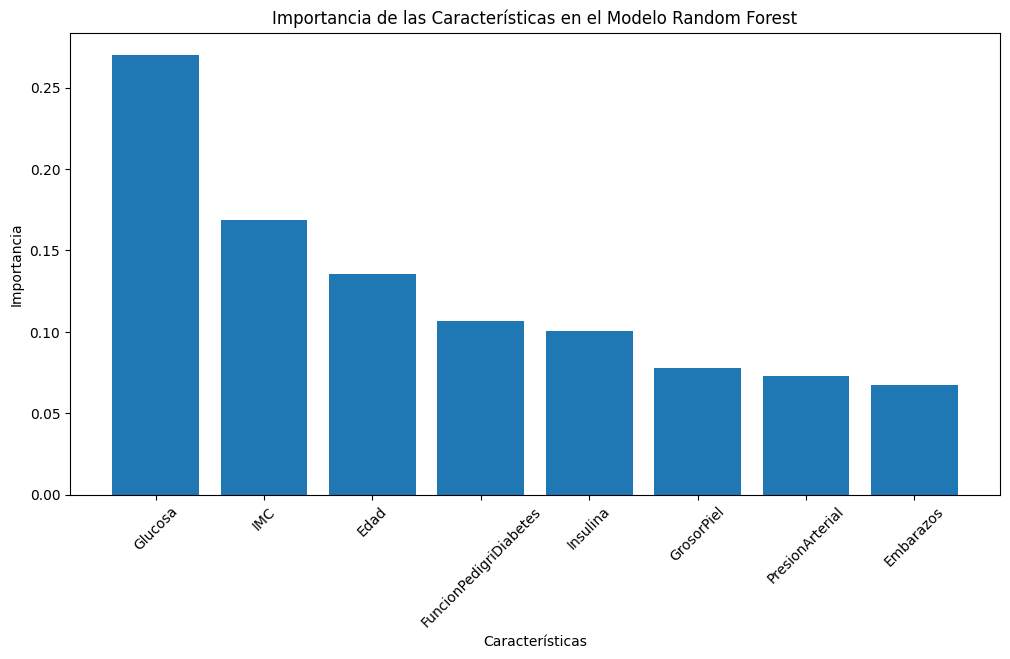

In [ ]:
feature_importances = rf_optimized.feature_importances_

# Convertir las importancias en un DataFrame para facilitar la visualización
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Ordenar las características por importancia
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(feature_importances_df['feature'], feature_importances_df['importance'])
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las Características en el Modelo Random Forest')
plt.xticks(rotation=45)
plt.show()

# Regresiones con Random Forest

Después de explorar el uso de Random Forest para problemas de clasificación, ahora nos centraremos en su aplicación en problemas de regresión. El algoritmo de Random Forest es versátil y puede ser utilizado tanto para clasificación como para regresión. Sin embargo, hay diferencias fundamentales entre estos dos tipos de problemas que afectan cómo se construye y evalúa el modelo.

## Diferencia entre Clasificación y Regresión

La principal diferencia entre clasificación y regresión radica en el tipo de variable objetivo que se está prediciendo:

- **Clasificación**: En los problemas de clasificación, la variable objetivo es categórica. Los modelos de clasificación predicen etiquetas discretas (como 'sí' o 'no', 'spam' o 'no spam', etc.). En Random Forest, esto se logra mediante el uso de `RandomForestClassifier` en scikit-learn, donde el algoritmo realiza votaciones entre los árboles para decidir la clase de cada observación.

- **Regresión**: En los problemas de regresión, la variable objetivo es continua. Los modelos de regresión predicen valores numéricos (como el precio de una casa, la temperatura, etc.). Para la regresión con Random Forest, se utiliza `RandomForestRegressor`. Aquí, el algoritmo promedia las predicciones de todos los árboles para obtener un valor continuo.

## Implementación de Random Forest para Regresión

Para implementar un modelo de regresión con Random Forest, utilizamos la clase `RandomForestRegressor` de scikit-learn. Este modelo se comporta de manera similar al clasificador, pero está optimizado para predecir valores numéricos continuos en lugar de etiquetas de clase.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Separar las características y la variable objetivo
X = diabetes_df.drop('Glucosa', axis=1)
y = diabetes_df['Glucosa']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de Random Forest para regresión
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
predictions = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")

Error Cuadrático Medio (MSE): 705.6698601731601
Coeficiente de Determinación (R²): 0.27061078133949024


# Métricas de Rendimiento en Regresión: MSE y R²

Al trabajar con modelos de regresión, como el Random Forest para regresión, es crucial evaluar su rendimiento utilizando métricas adecuadas. Dos de las métricas más comunes en regresión son el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²).

## Error Cuadrático Medio (MSE)

El MSE es una medida que calcula el promedio de los cuadrados de los errores, es decir, la diferencia cuadrada entre los valores observados y los predichos. Se define como:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$

donde:
- $y_i$ es el valor observado.
- $\hat{y_i}$ es el valor predicho.
- $n$ es el número de observaciones.

Un MSE más bajo indica un mejor rendimiento, ya que significa que la diferencia entre los valores observados y predichos es, en promedio, menor. Sin embargo, es importante tener en cuenta que el MSE es sensible a los valores atípicos, ya que penaliza más los errores grandes.

## Coeficiente de Determinación (R²)

El R² es una medida que indica qué proporción de la varianza en la variable dependiente es predecible a partir de las variables independientes. Se calcula como:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

donde:
- $\bar{y}$ es la media de los valores observados.

El R² varía entre 0 y 1, donde un valor más cercano a 1 indica que una mayor proporción de la varianza está siendo explicada por el modelo, lo cual es deseable. Un R² bajo sugiere que el modelo no explica bien la varianza de los datos.

## Interpretación

- **MSE**: Proporciona una idea de cuán cerca están las predicciones del modelo a los valores reales en términos de error absoluto.
- **R²**: Ofrece una visión de qué tan bien las predicciones del modelo se ajustan a la variabilidad de los datos.

Ambas métricas son importantes para evaluar y comparar modelos de regresión, pero siempre deben ser consideradas en el contexto del problema específico y del conjunto de datos con los que se está trabajando.

# Optimización de Hiperparámetros en Random Forest para Regresión

Tras evaluar nuestro modelo inicial de regresión de Random Forest utilizando MSE y R², el próximo paso es optimizar los hiperparámetros para mejorar estas métricas. Al igual que en los problemas de clasificación, podemos utilizar técnicas como la Búsqueda Aleatoria (Random Search) y la Búsqueda en Rejilla (Grid Search) para encontrar la mejor combinación de hiperparámetros.

## Enfoque para la Optimización

El objetivo es ajustar los hiperparámetros de tal manera que reduzcamos el error de predicción (bajo MSE) y aumentemos la varianza explicada (alto R²). Las técnicas de búsqueda nos permiten explorar sistemáticamente una gama de posibles valores de hiperparámetros y evaluar cuál combinación ofrece el mejor rendimiento.

## Parámetros Importantes en RandomForestRegressor

Algunos de los hiperparámetros clave en `RandomForestRegressor` que generalmente se ajustan incluyen:

- `n_estimators`: Número de árboles en el bosque.
- `max_features`: Número máximo de características consideradas para dividir un nodo.
- `max_depth`: Profundidad máxima de los árboles.
- `min_samples_split`: Número mínimo de muestras requeridas para dividir un nodo interno.
- `min_samples_leaf`: Número mínimo de muestras requeridas para estar en un nodo hoja.
- `bootstrap`: Método para muestrear los datos (con o sin reemplazo).

## Implementación de la Optimización

La implementación de estas técnicas de búsqueda es similar a la que se utiliza en clasificación, ajustando los parámetros específicos para el contexto de la regresión. Después de encontrar la mejor combinación de parámetros, evaluamos el modelo nuevamente para ver si hay una mejora en MSE y R².
